In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df = pd.read_csv('Airbnb_Open_Data.csv',dtype='unicode')

In [3]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10,9,10/19/2021,0.21,4,6,286,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30,45,5/21/2022,0.38,4,2,228,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3,0,NaN,NaN,5,1,352,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30,270,7/5/2019,4.64,4,1,322,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10,9,11/19/2018,0.1,3,1,289,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1,0,NaN,NaN,3,1,227,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.8046,-73.96545,United States,...,$167,1,1,7/6/2015,0.02,2,2,395,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3,0,NaN,NaN,5,1,342,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2,5,10/11/2015,0.1,3,1,386,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              102599 non-null  object
 1   NAME                            102349 non-null  object
 2   host id                         102599 non-null  object
 3   host_identity_verified          102310 non-null  object
 4   host name                       102193 non-null  object
 5   neighbourhood group             102570 non-null  object
 6   neighbourhood                   102583 non-null  object
 7   lat                             102591 non-null  object
 8   long                            102591 non-null  object
 9   country                         102067 non-null  object
 10  country code                    102468 non-null  object
 11  instant_bookable                102494 non-null  object
 12  cancellation_policy           

In [5]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10,9,10/19/2021,0.21,4,6,286,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30,45,5/21/2022,0.38,4,2,228,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3,0,NaN,NaN,5,1,352,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30,270,7/5/2019,4.64,4,1,322,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10,9,11/19/2018,0.1,3,1,289,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.dtypes

id                                object
NAME                              object
host id                           object
host_identity_verified            object
host name                         object
neighbourhood group               object
neighbourhood                     object
lat                               object
long                              object
country                           object
country code                      object
instant_bookable                  object
cancellation_policy               object
room type                         object
Construction year                 object
price                             object
service fee                       object
minimum nights                    object
number of reviews                 object
last review                       object
reviews per month                 object
review rate number                object
calculated host listings count    object
availability 365                  object
house_rules     

In [7]:
df.shape

(102599, 26)

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
102594     True
102595     True
102596     True
102597     True
102598     True
Length: 102599, dtype: bool

In [9]:
df.duplicated().sum()

541

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(102058, 26)

In [12]:
# Dropping columns that are less relevant for price prediction
# We created a variable called 'data_cleaned' to clean data and handle missing data
columns_to_drop = ['id', 'host id', 'host name', 'license', 'last review', 'NAME','service fee']
data_cleaned = df.drop(columns=columns_to_drop)

In [13]:
# For columns with numerical data, we can consider filling missing values with the median or mean
numerical_columns = ['Construction year', 'minimum nights', 'number of reviews',
                     'reviews per month', 'review rate number', 'calculated host listings count',
                     'availability 365']
for col in numerical_columns:
    data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

In [14]:
categorical_columns = ['host_identity_verified', 'neighbourhood group', 'neighbourhood',
                       'country', 'country code', 'instant_bookable', 'cancellation_policy',
                       'room type', 'house_rules']
for col in categorical_columns:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

In [15]:
df.shape

(102058, 26)

In [16]:
df.duplicated().sum()

0

In [17]:
# Removing rows with missing 'price'
data_cleaned = data_cleaned.dropna(subset=['price'])

In [18]:
#we need to convert 'price' to numerical values
# Removing the dollar sign and converting to float
data_cleaned['price'] = data_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

In [19]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10,9,10/19/2021,0.21,4,6,286,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30,45,5/21/2022,0.38,4,2,228,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3,0,NaN,NaN,5,1,352,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30,270,7/5/2019,4.64,4,1,322,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10,9,11/19/2018,0.1,3,1,289,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,7,12,3/27/2019,0.44,5,1,0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,1,19,8/31/2017,0.72,3,2,0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.6781,-73.90822,United States,...,NaN,2,50,6/26/2019,3.12,4,2,235,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,2,0,NaN,NaN,1,1,0,Each of us is working and/or going to school a...,NaN


In [20]:
# Checking the dataset after handling missing values
data_cleaned.isnull().sum(), data_cleaned.shape

(host_identity_verified            0
 neighbourhood group               0
 neighbourhood                     0
 lat                               8
 long                              8
 country                           0
 country code                      0
 instant_bookable                  0
 cancellation_policy               0
 room type                         0
 Construction year                 0
 price                             0
 minimum nights                    0
 number of reviews                 0
 reviews per month                 0
 review rate number                0
 calculated host listings count    0
 availability 365                  0
 house_rules                       0
 dtype: int64,
 (101811, 19))

In [21]:
df2=df.copy()

In [22]:
df2

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10,9,10/19/2021,0.21,4,6,286,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30,45,5/21/2022,0.38,4,2,228,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3,0,NaN,NaN,5,1,352,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30,270,7/5/2019,4.64,4,1,322,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10,9,11/19/2018,0.1,3,1,289,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,7,12,3/27/2019,0.44,5,1,0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,1,19,8/31/2017,0.72,3,2,0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.6781,-73.90822,United States,...,NaN,2,50,6/26/2019,3.12,4,2,235,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,2,0,NaN,NaN,1,1,0,Each of us is working and/or going to school a...,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              102058 non-null  object
 1   NAME                            101808 non-null  object
 2   host id                         102058 non-null  object
 3   host_identity_verified          101769 non-null  object
 4   host name                       101654 non-null  object
 5   neighbourhood group             102029 non-null  object
 6   neighbourhood                   102042 non-null  object
 7   lat                             102050 non-null  object
 8   long                            102050 non-null  object
 9   country                         101526 non-null  object
 10  country code                    101927 non-null  object
 11  instant_bookable                101953 non-null  object
 12  cancellation_policy             101

In [24]:
df.shape

(102058, 26)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


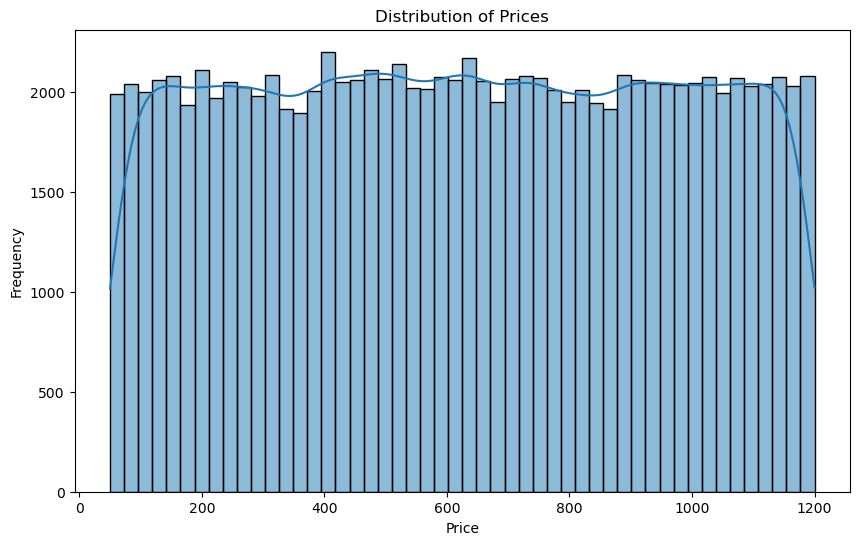

In [26]:
# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'], kde=True, bins=50)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

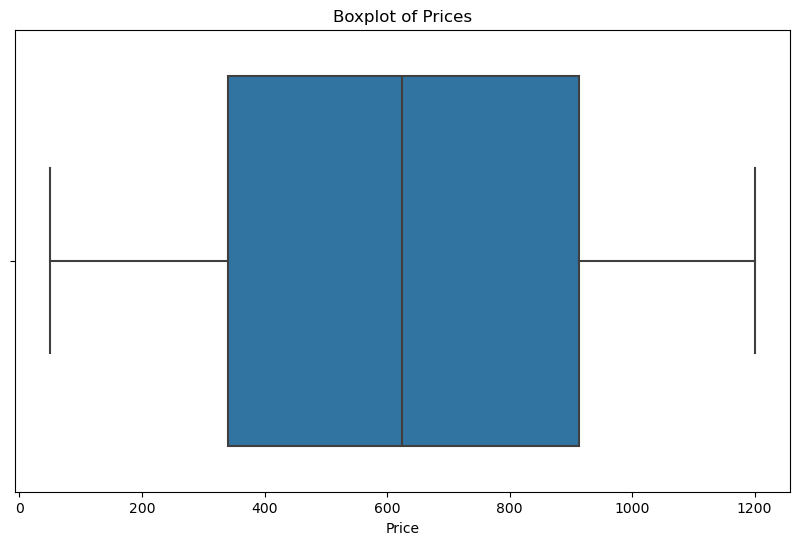

In [27]:
# Boxplot for Prices (to identify outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

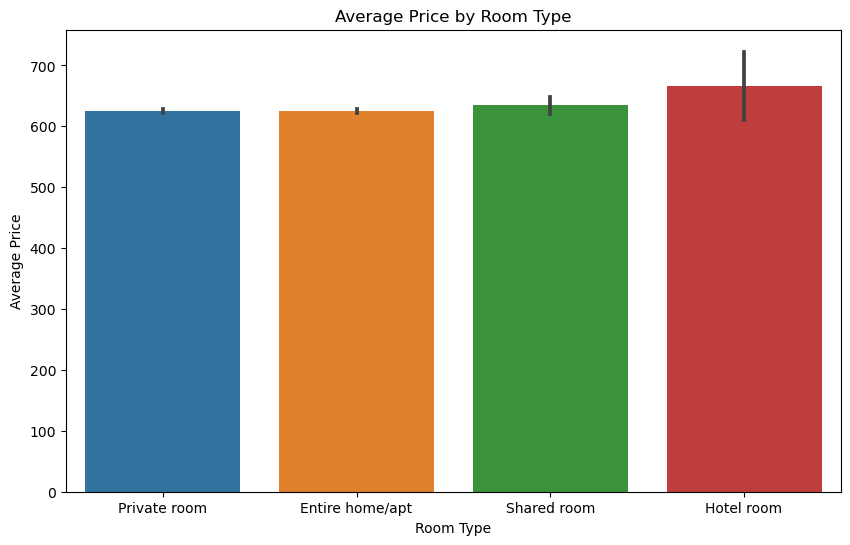

In [28]:
# Room Type vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='room type', y='price', data=data_cleaned)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

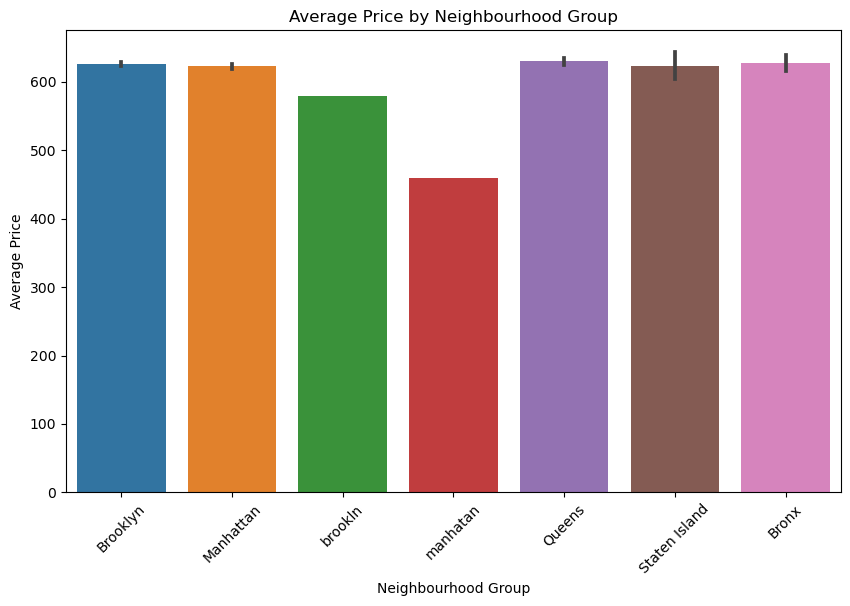

In [29]:
# Neighbourhood Group vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood group', y='price', data=data_cleaned)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Summary Statistics
summary_statistics = data_cleaned.describe()
summary_statistics

,price
count,101811.000000
mean,625.355580
std,331.672649
min,50.000000
25%,340.000000
50%,625.000000
75%,913.000000
max,1200.000000


In [31]:
df['service fee'].isna().count()

102058

In [32]:
df['service fee'].isna()==0

0          True
1          True
2          True
3          True
4          True
          ...  
102053    False
102054    False
102055    False
102056    False
102057    False
Name: service fee, Length: 102058, dtype: bool

In [33]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10,9,10/19/2021,0.21,4,6,286,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30,45,5/21/2022,0.38,4,2,228,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3,0,NaN,NaN,5,1,352,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30,270,7/5/2019,4.64,4,1,322,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10,9,11/19/2018,0.1,3,1,289,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,7,12,3/27/2019,0.44,5,1,0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,1,19,8/31/2017,0.72,3,2,0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.6781,-73.90822,United States,...,NaN,2,50,6/26/2019,3.12,4,2,235,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,2,0,NaN,NaN,1,1,0,Each of us is working and/or going to school a...,NaN


In [34]:
# Apply the function
df = df.fillna(0)
 
# print the DataFrame
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10,9,10/19/2021,0.21,4,6,286,Clean up and treat the home the way you'd like...,0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30,45,5/21/2022,0.38,4,2,228,Pet friendly but please confirm with me if the...,0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,0,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3,0,0,0,5,1,352,"I encourage you to use my kitchen, cooking and...",0
3,1002755,0,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30,270,7/5/2019,4.64,4,1,322,0,0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10,9,11/19/2018,0.1,3,1,289,"Please no smoking in the house, porch or on th...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,0,7,12,3/27/2019,0.44,5,1,0,Shoes off Clean After yourself Turn Lights and...,0
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,0,1,19,8/31/2017,0.72,3,2,0,#NAME?,0
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.6781,-73.90822,United States,...,0,2,50,6/26/2019,3.12,4,2,235,* Check out: 10am * We made an effort to keep ...,0
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,0,2,0,0,0,1,1,0,Each of us is working and/or going to school a...,0


In [35]:
import numpy as np

In [36]:
def costFunction(X,Y,W):
h=X.dot(W)
J=np.sum(((h-Y)**2)/(2*len(Y))
return J


IndentationError: expected an indented block after function definition on line 1 (3756999663.py, line 2)